In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from pprint import pprint
import numpy as np
import math

In [2]:
flpth = "../Dataset/CrimeData.csv"
dfCrime = pd.read_csv(flpth)
dfCrime.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [3]:
dfc = dfCrime.groupby(["Year","Sub_Group_Name"])
Crimedf0 = dfc.sum().reset_index()
Crimedf=Crimedf0.loc[Crimedf0["Sub_Group_Name"]!="7. Total Property Stolen & Recovered"]
Crimedf.head()

,Year,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,2001,1. Dacoity,2159,5656,220807802,620310858
1,2001,2. Robbery,8059,18605,311445393,856965368
2,2001,3. Burglary,27732,97191,981732616,2560974413
3,2001,4. Theft,87406,246005,2141396906,6229527433
4,2001,5. Criminal Breach of Trust,3785,10415,460112438,2102447889


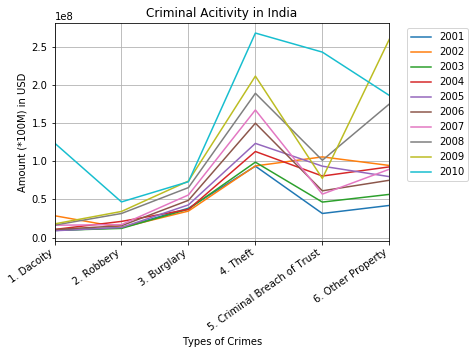

In [4]:
plt.plot(Crimedf.loc[Crimedf["Year"]==2001,"Sub_Group_Name"],(Crimedf.loc[Crimedf["Year"]==2001,"Value_of_Property_Stolen"])*.015,label = "2001")
plt.plot(Crimedf.loc[Crimedf["Year"]==2002,"Sub_Group_Name"],(Crimedf.loc[Crimedf["Year"]==2002,"Value_of_Property_Stolen"])*.015,label = "2002")
plt.plot(Crimedf.loc[Crimedf["Year"]==2003,"Sub_Group_Name"],(Crimedf.loc[Crimedf["Year"]==2003,"Value_of_Property_Stolen"])*.015,label = "2003")
plt.plot(Crimedf.loc[Crimedf["Year"]==2004,"Sub_Group_Name"],(Crimedf.loc[Crimedf["Year"]==2004,"Value_of_Property_Stolen"])*.015,label = "2004")
plt.plot(Crimedf.loc[Crimedf["Year"]==2005,"Sub_Group_Name"],(Crimedf.loc[Crimedf["Year"]==2005,"Value_of_Property_Stolen"])*.015,label = "2005")
plt.plot(Crimedf.loc[Crimedf["Year"]==2006,"Sub_Group_Name"],(Crimedf.loc[Crimedf["Year"]==2006,"Value_of_Property_Stolen"])*.015,label = "2006")
plt.plot(Crimedf.loc[Crimedf["Year"]==2007,"Sub_Group_Name"],(Crimedf.loc[Crimedf["Year"]==2007,"Value_of_Property_Stolen"])*.015,label = "2007")
plt.plot(Crimedf.loc[Crimedf["Year"]==2008,"Sub_Group_Name"],(Crimedf.loc[Crimedf["Year"]==2008,"Value_of_Property_Stolen"])*.015,label = "2008")
plt.plot(Crimedf.loc[Crimedf["Year"]==2009,"Sub_Group_Name"],(Crimedf.loc[Crimedf["Year"]==2009,"Value_of_Property_Stolen"])*.015,label = "2009")
plt.plot(Crimedf.loc[Crimedf["Year"]==2010,"Sub_Group_Name"],(Crimedf.loc[Crimedf["Year"]==2010,"Value_of_Property_Stolen"])*.015,label = "2010")

plt.xticks(rotation = 35, ha = "right")

plt.legend(loc = "best",bbox_to_anchor=(0.5, 0.5, 0.75, 0.5))

plt.title("Criminal Acitivity in India")
plt.xlabel("Types of Crimes")
plt.ylabel("Amount (*100M) in USD")
plt.grid()
plt.xlim(0,5)
plt.show()

In [5]:
url = "https://api.tradingeconomics.com/historical/country/india/indicator/gdp?c=guest:guest&format=json"
data = requests.get(url).json()
pprint(data)

[{'Category': 'GDP',
  'Country': 'India',
  'DateTime': '2009-12-31T00:00:00',
  'Frequency': 'Yearly',
  'HistoricalDataSymbol': 'WGDPINDI',
  'LastUpdate': '2019-07-01T15:00:00',
  'Value': 1341.89},
 {'Category': 'GDP',
  'Country': 'India',
  'DateTime': '2010-12-31T00:00:00',
  'Frequency': 'Yearly',
  'HistoricalDataSymbol': 'WGDPINDI',
  'LastUpdate': '2019-07-01T15:00:00',
  'Value': 1675.62},
 {'Category': 'GDP',
  'Country': 'India',
  'DateTime': '2011-12-31T00:00:00',
  'Frequency': 'Yearly',
  'HistoricalDataSymbol': 'WGDPINDI',
  'LastUpdate': '2017-07-03T16:14:00',
  'Value': 1823.05},
 {'Category': 'GDP',
  'Country': 'India',
  'DateTime': '2012-12-31T00:00:00',
  'Frequency': 'Yearly',
  'HistoricalDataSymbol': 'WGDPINDI',
  'LastUpdate': '2017-07-03T16:14:00',
  'Value': 1827.64},
 {'Category': 'GDP',
  'Country': 'India',
  'DateTime': '2013-12-31T00:00:00',
  'Frequency': 'Yearly',
  'HistoricalDataSymbol': 'WGDPINDI',
  'LastUpdate': '2017-07-03T16:14:00',
  'Val

In [6]:
DateTime=[]
Val = []
import datetime

for datum in range(len(data)):
    date_time_str = data[datum]['DateTime']
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S')
    DateTime.append(date_time_obj.date().year)
    Val.append(data[datum]['Value'])

print(DateTime)
print(Val)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
[1341.89, 1675.62, 1823.05, 1827.64, 1856.72, 2039.13, 2103.59, 2290.43, 2652.55, 2726.32]


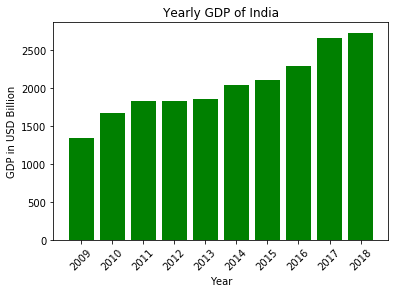

In [7]:
x_axis = np.arange(len(DateTime))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],rotation = "45")
plt.bar(x_axis,Val,color = "green",align = "center")
plt.title("Yearly GDP of India")
plt.xlabel("Year")
plt.ylabel("GDP in USD Billion")
plt.show()

In [8]:
flpth2 = "../Dataset/UnemploymentIndia.xlsx"
dfuer= pd.read_excel(flpth2)
dfuer.head()

,Country Name,Country Code,Series Name,Series Code,Scale (Precision),1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Unit (0.0),NaN,3.8,3.7,3.7,3.7,...,4.1,4.1,3.8,3.5,3.5,3.6,3.5,3.4,3.5,3.5
1,India,IND,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,Unit (0.0),NaN,8.5,8.3,8.4,8.1,...,10.0,10.8,10.2,10.1,10.3,10.6,10.1,10.0,10.4,10.5
2,India,IND,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,Unit (0.0),NaN,4.0,3.9,3.9,3.9,...,4.8,4.6,4.5,4.4,4.3,4.2,4.2,4.1,4.2,4.2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
del dfuer['1990 [YR1990]']
dfuer.head()

,Country Name,Country Code,Series Name,Series Code,Scale (Precision),1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Unit (0.0),3.8,3.7,3.7,3.7,3.7,...,4.1,4.1,3.8,3.5,3.5,3.6,3.5,3.4,3.5,3.5
1,India,IND,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,Unit (0.0),8.5,8.3,8.4,8.1,8.3,...,10.0,10.8,10.2,10.1,10.3,10.6,10.1,10.0,10.4,10.5
2,India,IND,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,Unit (0.0),4.0,3.9,3.9,3.9,4.0,...,4.8,4.6,4.5,4.4,4.3,4.2,4.2,4.1,4.2,4.2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dfuer.dropna(how="any")

,Country Name,Country Code,Series Name,Series Code,Scale (Precision),1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Unit (0.0),3.8,3.7,3.7,3.7,3.7,...,4.1,4.1,3.8,3.5,3.5,3.6,3.5,3.4,3.5,3.5
1,India,IND,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,Unit (0.0),8.5,8.3,8.4,8.1,8.3,...,10.0,10.8,10.2,10.1,10.3,10.6,10.1,10.0,10.4,10.5
2,India,IND,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,Unit (0.0),4.0,3.9,3.9,3.9,4.0,...,4.8,4.6,4.5,4.4,4.3,4.2,4.2,4.1,4.2,4.2


In [11]:
dfe =pd.DataFrame(dfuer.iloc[0,21:31]).reset_index()
dfe

,index,0
0,2007 [YR2007],4.1
1,2008 [YR2008],4.1
2,2009 [YR2009],3.8
3,2010 [YR2010],3.5
4,2011 [YR2011],3.5
5,2012 [YR2012],3.6
6,2013 [YR2013],3.5
7,2014 [YR2014],3.4
8,2015 [YR2015],3.5
9,2016 [YR2016],3.5


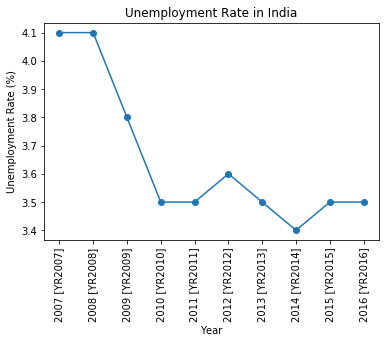

In [12]:
plt.plot(dfe['index'],dfe[0],marker = "o")
plt.xticks(rotation = "vertical")
plt.title("Unemployment Rate in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

In [13]:
dfI=pd.read_csv("../Dataset/CPI_India.csv")
dfI.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [14]:
dfI1 = dfI[(dfI["Sector"]=="Rural+Urban") & (dfI["Month"]=="December")]
dfI1.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
35,Rural+Urban,2013,December,119.1,116.7,123.5,113.4,107.3,113.3,145.4,...,110.7,111.9,111.7,109.7,109.8,109.0,111.5,107.9,110.0,114.5
71,Rural+Urban,2014,December,122.9,123.2,123.5,124.5,107.6,125.7,140.5,...,116.5,115.7,117.5,115.1,110.1,113.9,119.5,109.8,113.8,119.4
107,Rural+Urban,2015,December,125.7,131.4,124.8,129.4,115.3,126.6,146.7,...,122.4,122.0,123.6,121.4,111.5,119.6,126.2,113.7,118.3,126.1
143,Rural+Urban,2016,December,132.3,137.6,132.9,135.1,118.6,132.7,125.3,...,128.5,126.6,129.2,126.9,116.0,124.2,133.1,121.1,123.9,130.4
179,Rural+Urban,2017,December,135.8,143.3,145.2,141.0,120.5,141.5,161.7,...,139.1,136.6,134.7,133.1,118.5,129.0,138.5,126.5,128.6,137.2


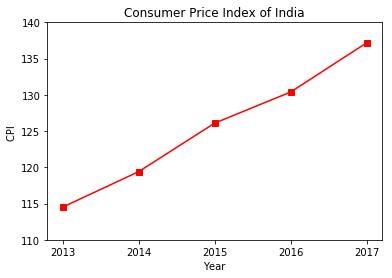

In [15]:
plt.plot(dfI1["Year"],dfI1["General index"],color = "red",marker="s")
plt.title("Consumer Price Index of India")
plt.xlabel("Year")
plt.ylabel("CPI ")
plt.xticks(dfI1["Year"])
plt.ylim(110,140)
plt.show()

In [16]:
dfCU=pd.read_excel("../Dataset/ChinaUnemployment.xlsx")
dfCU

,China: unemployment rate,Unemployment rate
0,2012,4.09
1,2013,4.05
2,2014,4.09
3,2015,4.05
4,2016,4.02
5,2017,3.90


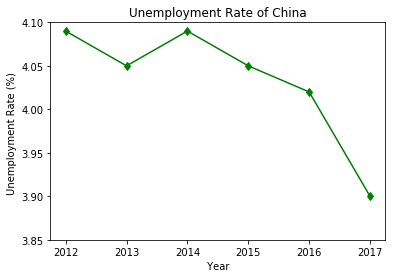

In [17]:
plt.plot(dfCU["China: unemployment rate"],dfCU["Unemployment rate"],color = "green",marker="d")
plt.title("Unemployment Rate of China")
plt.xlabel(" Year ")
plt.ylabel("Unemployment Rate (%) ")
plt.xticks(dfCU["China: unemployment rate"])
plt.ylim(3.85,4.1)
plt.show()

In [18]:
#China Inflation
urlc = "https://api.worldbank.org/countries/CHN/indicators/FP.CPI.TOTL.ZG?format=json&per_page=10000"
dataci= requests.get(urlc).json()
dataci

[{'page': 1, 'pages': 1, 'per_page': '10000', 'total': 59},
 [{'indicator': {'id': 'FP.CPI.TOTL.ZG',
    'value': 'Inflation, consumer prices (annual %)'},
   'country': {'id': 'CN', 'value': 'China'},
   'value': '2.07478890229193',
   'decimal': '1',
   'date': '2018'},
  {'indicator': {'id': 'FP.CPI.TOTL.ZG',
    'value': 'Inflation, consumer prices (annual %)'},
   'country': {'id': 'CN', 'value': 'China'},
   'value': '1.59313725490194',
   'decimal': '1',
   'date': '2017'},
  {'indicator': {'id': 'FP.CPI.TOTL.ZG',
    'value': 'Inflation, consumer prices (annual %)'},
   'country': {'id': 'CN', 'value': 'China'},
   'value': '2.00000000000002',
   'decimal': '1',
   'date': '2016'},
  {'indicator': {'id': 'FP.CPI.TOTL.ZG',
    'value': 'Inflation, consumer prices (annual %)'},
   'country': {'id': 'CN', 'value': 'China'},
   'value': '1.4370245139476',
   'decimal': '1',
   'date': '2015'},
  {'indicator': {'id': 'FP.CPI.TOTL.ZG',
    'value': 'Inflation, consumer prices (annual

In [19]:
inflation_China = []
infc_Year = []

for data in range(len(dataci[1])):
    inflation_China.append(dataci[1][data]['value'])
    infc_Year.append(dataci[1][data]['date'])
    
print(inflation_China)
print(infc_Year)

['2.07478890229193', '1.59313725490194', '2.00000000000002', '1.4370245139476', '1.92164341593894', '2.62104902701091', '2.61952616488542', '5.55389705904324', '3.17532798075574', '-0.728171334173071', '5.9252552887092', '4.81676531343752', '1.6494331013998', '1.77641616843146', '3.82463762400933', '1.12760196090496', '-0.731975500083577', '0.719132436811498', '0.347806256807194', '-1.40147380776612', '-0.773182345961248', '2.78646849655587', '8.31315334383153', '16.7912270168851', '24.2569843505754', '14.6100786356603', '6.3539813402487', '3.55668565220451', '3.05229012075233', '18.2456383621648', '18.8118179448753', '7.23383553065603', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',

In [20]:
inf_df = pd.DataFrame(inflation_China,infc_Year).reset_index()
inf_df.columns = ["Year","Inflation_Rate"]
inf_df1 = inf_df.head(9).sort_values(by ="Year")
inf_df1

,Year,Inflation_Rate
8,2010,3.17532798075574
7,2011,5.55389705904324
6,2012,2.61952616488542
5,2013,2.62104902701091
4,2014,1.92164341593894
3,2015,1.4370245139476
2,2016,2.00000000000002
1,2017,1.59313725490194
0,2018,2.07478890229193


In [21]:
inf_df1["Inflation_Rate"] = pd.to_numeric(inf_df1["Inflation_Rate"])

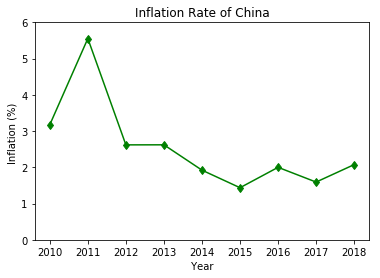

In [22]:
plt.plot(inf_df1["Year"],inf_df1["Inflation_Rate"],color = "green",marker="d")
plt.title("Inflation Rate of China")
plt.xlabel(" Year ")
plt.ylabel("Inflation (%) ")
plt.xticks(inf_df1["Year"])
plt.ylim(0,6)
plt.show()